## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
len(df.query('group == "treatment" & landing_page != "new_page"')) \
+ len(df.query('group != "treatment" & landing_page == "new_page"'))

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

* The best way to solve the missmatched data is by removing them.

only kepping rows where ( **treatment**& **new_page** )  , (**control** & **old_page** )   match.

In [9]:
df_a = df.query('group == "treatment" & landing_page == "new_page"')
df_b = df.query('group == "control" & landing_page == "old_page"')
df2 = pd.concat([df_a,df_b])

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'],keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

* info `user_id` in above cell **(773192)** 

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# drop one of the rows by label index
df2.drop(labels= 1899,inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
len(df2.query('group == "control" & converted == 1 ')) / df2[df2['group'] == "control"].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
len(df2.query('group == "treatment" & converted == 1 ')) / df2[df2['group'] == "treatment"].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
len(df2.query('landing_page == "new_page"')) / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### <b> Notes: </b>
- the propapility of someone converted is **0.1195**
- the propapility of someone converted given they in `treatment` group is **0.1188**
- the propapility of someone converted given they in `control` group is **0.1203**
- the propapility of someone recieving `new page` is **0.5001**
- the propapility of who converted in either groups is very close to one another also ot seems that half of the population recieved `new page` while the other half recieved `old page` , so there is no sufficient evidence that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* <b>Hypotheses :</b>

<h4 align="center"> $H_{0}$ :  $p_{new}$  &le;  $p_{old}$ </h4>
                                        
<h4 align="center"> $H_{1}$ :  $p_{new}$  &gt;  $p_{old}$  </h4>
                       
- We can say the null hypothesis is the new page is the same or worse than old page.
- While alternative which we want to prove is new page is better than old page.


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# both p_new and p_old are the same under the null or p_new is less 
# so we can assume same conversion rate
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# n_new is the number who recieved new_page
n_new = len(df2[df2['landing_page'] == "new_page"])
n_new

145310

d. What is $n_{old}$?

In [21]:
# n_old is the number who recieved old page
n_old = len(df2[df2['landing_page'] == "old_page"]) 
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1],size=n_new,replace =True,p=[p_new,1-p_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1],size=n_old,replace =True,p=[p_old,1-p_old])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

7.775254744257776e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],size=n_new,replace =True,p=[p_new,1-p_new])
    old_page_converted = np.random.choice([0,1],size=n_old,replace =True,p=[p_old,1-p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

In [26]:
p_diffs = np.array(p_diffs)
p_diffs.mean()

-5.591187866633318e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

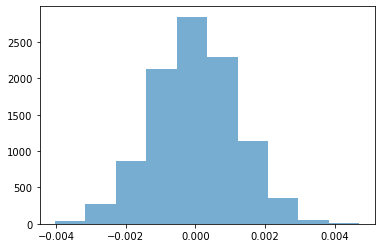

In [27]:
plt.hist(p_diffs,alpha =0.6);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

- fisrt we need to calculate the actual conversion for each page and get the observed differance between them

In [28]:
actual_new = df2[df2['landing_page'] == "new_page"].converted.mean()
actual_old = df2[df2['landing_page'] == "old_page"].converted.mean()
obs_diff = actual_new - actual_old
obs_diff

-0.0015782389853555567

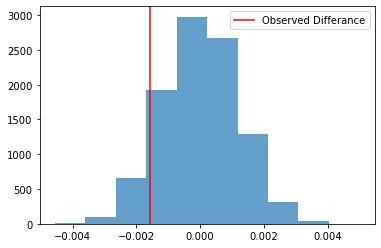

In [29]:
# simulate distribution under the null hypothesis with center 0
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

plt.hist(null_vals,alpha =0.7);
plt.axvline(x=obs_diff, color = 'red',label='Observed Differance');
plt.legend();

In [30]:
p_value = (null_vals > obs_diff).mean()
p_value

0.9083

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* we computed `p_value` : is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct

* in terms of pages : we have type| error rate of 5% where p_value(0.9) > alpha(0.05) so we failed to reject the null hypothesis
* there is enough evidence to show that there is a difference between the new and old pages as well old_page has higher conversion rate than new_page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" & converted == 1 '))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1 '))
n_old = len(df2[df2['landing_page'] == "old_page"])
n_new = len(df2[df2['landing_page'] == "new_page"])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_value ,P_value  = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new]\
                                                ,alternative='smaller',prop_var = False)
print("z_value =  ",z_value)
print("p_value =  ",P_value)

z_value =   1.3109241984234394
p_value =   0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- p_value & z_value gives the fact that we can't reject null hypothesis . as p_value(0.91) is higher than alpha in 95% confidnce with rate =0.05
- the findings in **j** is the same in **k** .
- the conversion rate of new page is the same or less than the old page

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- **Logistic Regression**  the dependent variable is a binary variable that contains data coded as 1,0 [converted,not converted]

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# create dummy variables for page recievied
df2[['new_page','old_page']] = pd.get_dummies(df['landing_page'])

# create dummy variables for group based on treatment = 1, control =0(baseline)
df2['ab_page'] =pd.get_dummies(df['group'])['treatment']

# drop col `old_page` and consider as baseline
df2 = df2.drop('old_page',axis =1)


In [34]:
df2.head()

,user_id,timestamp,group,landing_page,converted,new_page,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
# fit a model 
from scipy import stats
df2['intercept'] = 1

log_reg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# use summary2() instead of summary() to view results of logistic regression
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-09-07 04:39 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

- p_value associated with `ab_page` = **0.19**  higher so we can't reject null .
- coefficient is not significant.
- the regression model depended on null hypothesis : group treatment is same as control. 
- alternative hypothesis : treatment group is different from control group, also adding that new and old page affect positively or negatively.
- in part|| : the hypothesis depended on one sided test for conversion rate of new & old page giving that old page is better than new page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- it will be a good idea to consider as factors like `timestamp` maybe can play a significant role ,but the model will get more complex and harder to interpret

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [38]:
df_new.head()

,country,timestamp,group,landing_page,converted,new_page,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1


In [39]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [40]:
# make sure that no duplicates exist
df_new.duplicated().sum()

0

In [41]:
### Create the necessary dummy variables
df_new[['UK','US','CA']] = pd.get_dummies(df_new['country'])

# drop `CA` as baseline
df_new.drop('CA',inplace =True,axis =1)
df_new.head()

,country,timestamp,group,landing_page,converted,new_page,ab_page,intercept,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1


In [42]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-09-07 04:39 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
UK           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
US            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

- the country did not give differance as most coefficenits are negative 
- the p_value is higher than 0.05

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
# create interaction between page and country
df_new['page_UK'] = df_new['ab_page']*df_new['UK']
df_new['page_US'] = df_new['ab_page']*df_new['US']
df_new.head(3)

,country,timestamp,group,landing_page,converted,new_page,ab_page,intercept,UK,US,page_UK,page_US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0,1,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0,1


In [44]:
### Fit Your Linear Model And Obtain the Results
log_int = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','page_UK','US','page_US']])
res_int = log_int.fit()
res_int.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-09-07 04:39 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
page_UK      -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
US           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
page_US       0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

In [45]:
# to interpret interaction we need exponantial values of coefficients
np.exp(res_int.params)

intercept    0.137178
ab_page      0.979646
UK           0.982625
page_UK      0.954198
US           0.994272
page_US      1.031896
dtype: float64

In [46]:
# interpret comparsion to baseline 
1/np.exp(res_int.params)

intercept    7.289813
ab_page      1.020776
UK           1.017682
page_UK      1.048001
US           1.005761
page_US      0.969090
dtype: float64

### Summary of Part||| (regression) :
- p_value for is higher than 0.05 so all are statistically insignificant except `intercept` maybe statistically significant.
- for every user to be converted to a new page in UK increases 1.04 times than CA . 
- for every user to be converted to a new page in US increases 0.96 times than CA .

<a id='conclusions'></a>
## Conclusions

- There is not enough evidence that the new_page increases the conversion rate as compared to the old_page. we can also say that based on A/B test and regression 
 There is no strong evidence that the countries (US, CA and UK) influence the conversion rate.

